# Exploratory data analysis

## Import functions

In [ ]:
import openml
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

## Import data

In [54]:
credit_data = openml.datasets.get_dataset(31)  # Dataset ID 31 is German Credit

X, y, _, _ = credit_data.get_data(target=credit_data.default_target_attribute)

# Load the German Credit dataset from OpenML
credit_data = openml.datasets.get_dataset(31)  # Dataset ID 31 is German Credit
X, y, _, _ = credit_data.get_data(target=credit_data.default_target_attribute)


df = pd.DataFrame(X)
df['default'] = y

# see data
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,default
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3,female div/dep/mar,none,...,real estate,31,none,own,1,unskilled resident,1,none,yes,good
996,<0,30,existing paid,used car,3857.0,<100,1<=X<4,4,male div/sep,none,...,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good
997,no checking,12,existing paid,radio/tv,804.0,<100,>=7,4,male single,none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,existing paid,radio/tv,1845.0,<100,1<=X<4,4,male single,none,...,no known property,23,none,for free,1,skilled,1,yes,yes,bad


## Basic info from DataFrame

In [29]:
# Basic info
print(df.info())
print(df['default'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   uint8   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   uint8   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   uint8   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   uint8   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

### Check class balance (target)

In [30]:

# Distribution of target variable
# sns.countplot(x='default', data=df)
# plt.title('Default Distribution')
# plt.show()

print(df['default'].value_counts())
print(df['default'].value_counts(normalize=True))  # proportion

good    700
bad     300
Name: default, dtype: int64
good    0.7
bad     0.3
Name: default, dtype: float64


In [ ]:
## 30% is a well-balanced target for most classification models. No need to artificially rebalance

# Discrete variables analysis

### Looking for discrete variables that are significantly associated with the target variable

In [28]:
#The Chi-square test of independence checks whether two categorical variables are statistically related by 
# comparing the observed frequencies in a contingency table to the frequencies we would expect if they were independent.

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['default'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    print(f"{col}: p-value = {p:.4f}")

checking_status: p-value = 0.0000
credit_history: p-value = 0.0000
purpose: p-value = 0.0001
savings_status: p-value = 0.0000
employment: p-value = 0.0010
personal_status: p-value = 0.0222
other_parties: p-value = 0.0361
property_magnitude: p-value = 0.0000
other_payment_plans: p-value = 0.0016
housing: p-value = 0.0001
job: p-value = 0.5966
own_telephone: p-value = 0.2789
foreign_worker: p-value = 0.0158
default: p-value = 0.0000


In [ ]:
# The variables **job** and **own_telephone** are the only ones with a p-value > 0.05. They won't be used in the model

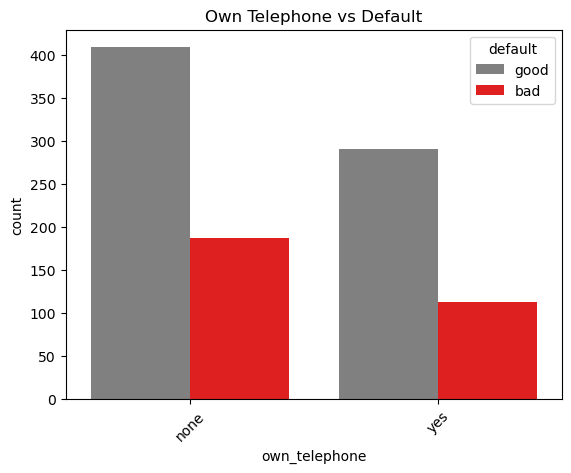

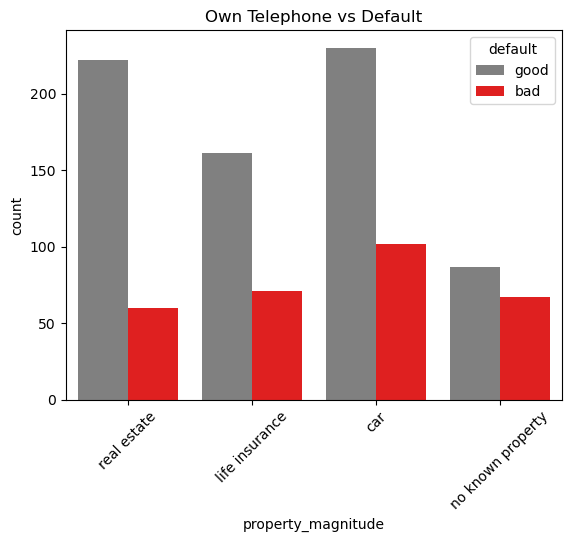

In [58]:
# Countplot example: why is the chi-square p-value > 0.05? (The default rate is the same even when the client has a telephone.)
sns.countplot(x='own_telephone', hue='default', data=df, palette={'good': 'gray', 'bad': 'red'})
plt.title('Own Telephone vs Default')
plt.xticks(rotation=45)
plt.show()

# Countplot example: why is the chi-square p-value < 0.05? (The default rate changes depening on the class)
sns.countplot(x='property_magnitude', hue='default', data=df, palette={'good': 'gray', 'bad': 'red'})
plt.title('Property magnitude vs Default')
plt.xticks(rotation=45)
plt.show()

# Continuous variables analysis

In [50]:
# Summary statistics of numerical columns
print(df.describe())

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000    

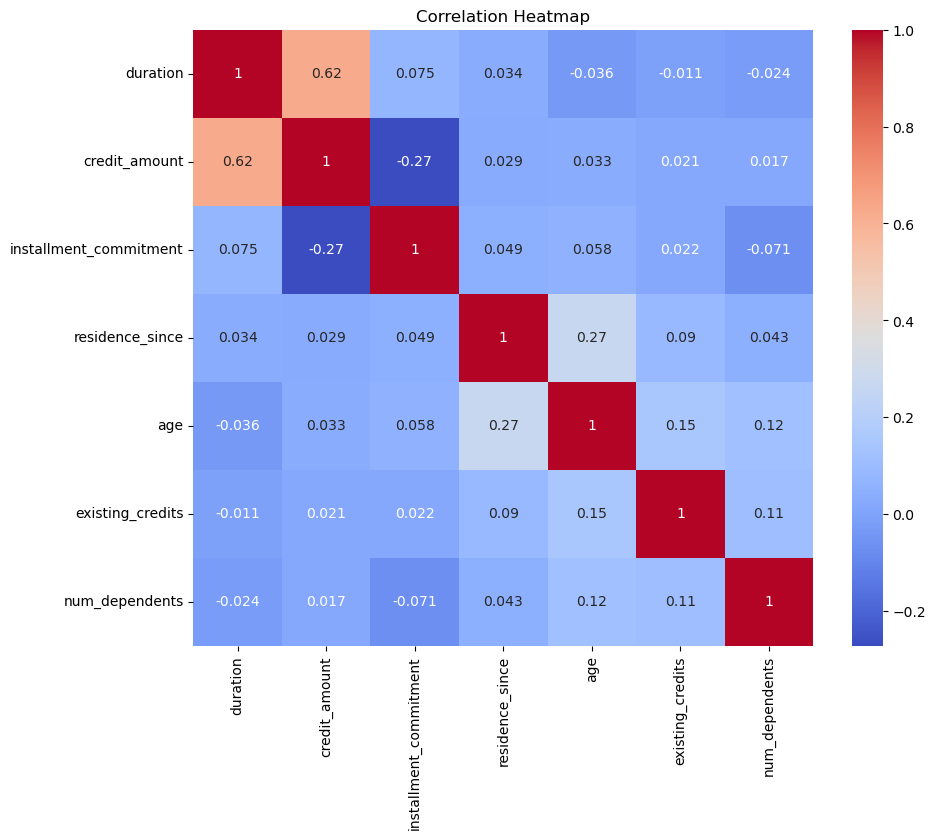

In [34]:
# Correlation heatmap (only numeric features)
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'uint8']).columns
# print(df.info())

corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [49]:
# One way to test the association between continuous variables and the target is by performing a t-test

for var in numeric_cols:
    group0 = df[df['default'] == 'good'][var]
    group1 = df[df['default'] == 'bad'][var]

    t_stat, p_value = ttest_ind(group0, group1)
    print(f"T-test var: {var} -> p-value: {p_value:.4f}")

T-test var: duration -> p-value: 0.0000
T-test var: credit_amount -> p-value: 0.0000
T-test var: installment_commitment -> p-value: 0.0220
T-test var: residence_since -> p-value: 0.9253
T-test var: age -> p-value: 0.0039
T-test var: existing_credits -> p-value: 0.1484
T-test var: num_dependents -> p-value: 0.9241


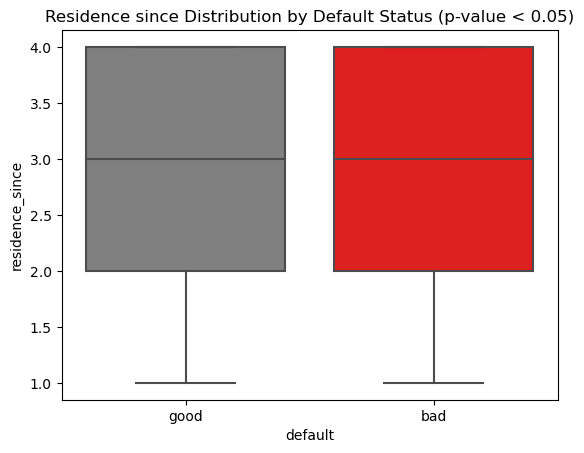

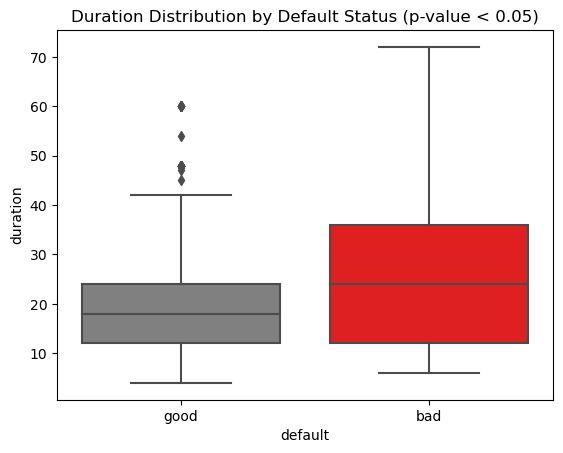

In [60]:
# Boxplot example: This is why residence_since has p-value > 0.05
sns.boxplot(x='default', y='residence_since', data=df, palette={'good':'gray', 'bad':'red'})
plt.title('Residence since Distribution by Default Status (p-value < 0.05)')
plt.show()

# Boxplot example: This is why duration has p-value < 0.05
sns.boxplot(x='default', y='duration', data=df, palette={'good':'gray', 'bad':'red'})
plt.title('Duration Distribution by Default Status (p-value < 0.05)')
plt.show()

# Conslusion

In this notebook, we imported a dataset and performed a quick exploratory data analysis. We showed the difference between analyzing discrete and continuous variables and demonstrated ways to check the significance of each type of variable in relation to the target